In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [4]:
# Посилання на CSV файли
TITANIC_CSV_TRAIN_DATA_URL = "~/Downloads/titanic-2/train.csv"
TITANIC_CSV_TEST_DATA_URL = "~/Downloads/titanic-2/test.csv"

INDEX_COL = 0
NAME_COL = "Name"
SEX_COL = "Sex"
PCLASS_COL = "Pclass"
AGE_COL = "Age"
SURVIVED_COL = "Survived"

AGE_GROUP_COL = "AgeGroup"

HEAD_ROWS_TO_SHOW = 15

In [5]:
#Вигрузка даних
data_train = pd.read_csv(TITANIC_CSV_TRAIN_DATA_URL)
data_test = pd.read_csv(TITANIC_CSV_TEST_DATA_URL)

In [6]:
data_train[:HEAD_ROWS_TO_SHOW]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
data_test[:HEAD_ROWS_TO_SHOW]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [8]:
#Розміри
data_train.shape, data_test.shape

((891, 12), (418, 11))

In [9]:
#Іформація про датасети
data_train.info(), data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [10]:
#Перевірка на незаповнені поля
data_train.isna().any(), data_test.isna().any()

(PassengerId    False
 Survived       False
 Pclass         False
 Name           False
 Sex            False
 Age             True
 SibSp          False
 Parch          False
 Ticket         False
 Fare           False
 Cabin           True
 Embarked        True
 dtype: bool,
 PassengerId    False
 Pclass         False
 Name           False
 Sex            False
 Age             True
 SibSp          False
 Parch          False
 Ticket         False
 Fare            True
 Cabin           True
 Embarked       False
 dtype: bool)

In [11]:
#Визначення кількості пропущеих полів
def counting_unfilled_cells(df, columns):  
    counts = [(df[col].isna() == 1).sum() for col in columns]
    print([(columns[i], counts[i]) for i in range(len(columns))])
    
counting_unfilled_cells(data_train, ['Age', 'Cabin', 'Embarked'])
counting_unfilled_cells(data_test, ['Age', 'Cabin', 'Fare'])

[('Age', 177), ('Cabin', 687), ('Embarked', 2)]
[('Age', 86), ('Cabin', 327), ('Fare', 1)]


In [12]:
#Загальний опис категорій
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data_train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [14]:
#Визначеня ймовірності порятунку пасажира
#Ймовірність по віку
data_train[['Age', 'Survived']].groupby('Age').mean().sort_values('Survived', ascending = False)

,Survived
Age,
0.42,1.0
5.00,1.0
63.00,1.0
53.00,1.0
0.67,1.0
...,...
28.50,0.0
36.50,0.0
34.50,0.0


<AxesSubplot:ylabel='AgeGroup'>

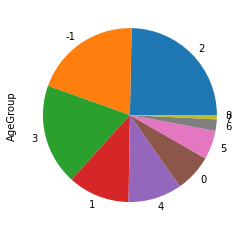

In [15]:
data_train[AGE_GROUP_COL] = data_train[AGE_COL]
data_train[AGE_GROUP_COL].fillna(-1, inplace=True)
data_train[AGE_GROUP_COL] = data_train[AGE_GROUP_COL].map(lambda age : int(age//10))
data_train[AGE_GROUP_COL].value_counts()
data_train[AGE_GROUP_COL].value_counts().plot.pie()

<AxesSubplot:ylabel='AgeGroup'>

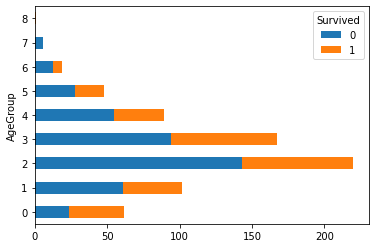

In [16]:
age_by_survived = data_train.groupby([AGE_GROUP_COL, SURVIVED_COL])
age_by_survived = age_by_survived.size().unstack()
age_by_survived_without_na = age_by_survived[1:].fillna(0)
age_by_survived_without_na.plot(kind='barh', stacked=True)

In [17]:
#Ймовірність по статі
data_train[['Sex', 'Survived']].groupby('Sex').mean().sort_values('Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [19]:
#Ймовірність по класу
data_train[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by = 'Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


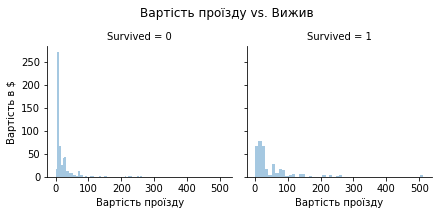

In [24]:
#Ймовірність по вартості квитка
g = sns.FacetGrid(data_train, col = 'Survived')
g = g.map(sns.distplot, 'Fare', bins = 50, kde = False)
g.set_axis_labels('Вартість проїзду','Вартість в $')
g.fig.subplots_adjust(top = 0.8)
g.fig.suptitle("Вартість проїзду vs. Вижив")
plt.show()

In [25]:
#Перевірка на пусті поля
data_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
AgeGroup       False
dtype: bool